In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [20]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

In [21]:
def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

Text(0, 0.5, 'y')

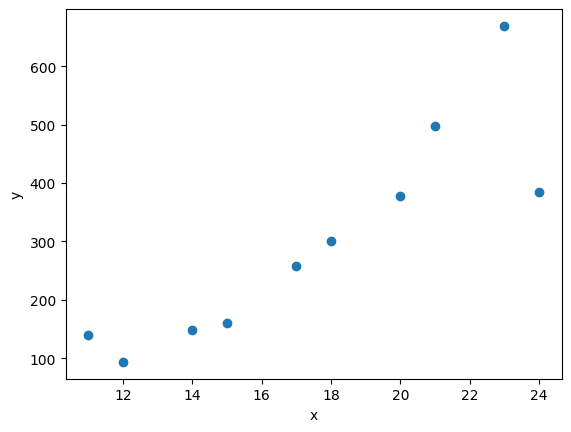

In [6]:
with open('lin_reg_training.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)

    X = data[:,0]
    y = data[:,1]


plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

 
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



 

standard_scaler = StandardScaler()

X = X.reshape(-1,1)
x_train = standard_scaler.fit_transform(X)
x_test = standard_scaler.transform(X)

poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)





-3103.6614912540454
-3103.6614912540454
Thetas:[[0.36561075]
 [0.03185133]
 [0.07052699]
 [0.035394  ]
 [0.08792384]
 [0.34624756]
 [1.6850393 ]]
-3103.6614912540454


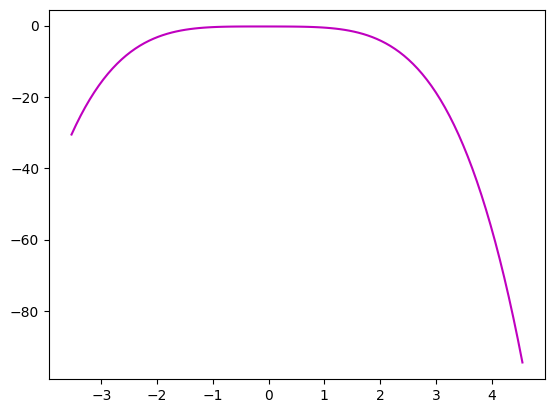

In [35]:
eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0], [0], [0], [0]])
X = x_train

X = X.reshape(7,10)

cost_old = calculate_cost(X,y,theta)
cost_new = np.inf

m = X.shape[1]



while abs(cost_old - cost_new) > eps:
    
    h_y_diff = (h_fun(X, theta) - y)
    
    gradient = h_y_diff @ X.T
    theta = theta - (alpha / m) * gradient.T
    
   
    cost_new = calculate_cost(X,y,theta)
    cost_old = cost_new
    
    print(cost_old)
    print(cost_new)


print(f"Thetas:{theta}")
print(cost_new)


x1_db = np.linspace(X[1, :].min(), X[1, :].max(), 100)
x2_db = -theta[0, 0]/theta[6, 0] - theta[1, 0]/theta[6, 0]*x1_db - theta[2, 0]/theta[6, 0] * x1_db ** 2  -theta[3, 0]/theta[6, 0] - theta[4, 0]/theta[6, 0]*x1_db ** 3 - theta[5, 0]/theta[6, 0] * x1_db ** 4 
plt.plot(x1_db, x2_db, '-m')
